In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import pickle

In [14]:
from analysis import get_success_stats, get_token_stats, get_time_stats, get_mcts_stats

In [15]:
from analysis import get_stats

In [16]:
d5_stats = get_stats("d5")
d10_stats = get_stats("d10")
d20_stats = get_stats("d20")
d100_stats = get_stats("e100")

df = pd.DataFrame([d5_stats, d10_stats, d20_stats, d100_stats], 
                  columns=["mcts_depth", "successes", "failures", "errors", "total_usd", "avg_usd", "token_df", "total_time", "avg_time", "time_df", "avg_completion_iteration", "avg_completion_depth", "mcts_df"])
df.set_index("mcts_depth", inplace=True)
df["success_rate"] = df["successes"] / (df[["successes", "failures", "errors"]].sum(axis=1))
df = df[["success_rate", "total_usd", "avg_usd", "total_time", "avg_time", "avg_completion_iteration", "avg_completion_depth", "successes", "failures", "errors", "token_df", "time_df", "mcts_df"]]
df

,success_rate,total_usd,avg_usd,total_time,avg_time,avg_completion_iteration,avg_completion_depth,successes,failures,errors,token_df,time_df,mcts_df
mcts_depth,,,,,,,,,,,,,
5,0.141509,4.861763,0.045866,40834.997811,385.235828,0.866667,4.266667,15,89,2,task_name usd_cost prompt_tokens pr...,task_name total_time_taken total_pro...,completion_iteration completion...
10,0.198113,6.413142,0.060501,57128.987742,538.952715,0.857143,5.238095,21,82,3,task_name usd_cost prompt_tokens pr...,task_name total_time_taken total_pro...,completion_iteration completion...
20,0.330189,9.009063,0.084991,91408.657527,862.345826,0.600000,7.314286,35,67,4,task_name usd_cost prompt_tokens pr...,task_name total_time_taken total_pro...,completion_iteration completion...
100,0.234694,24.347977,0.245939,151213.642555,1527.410531,0.000000,7.521739,23,71,4,task_name usd_cost prompt_tokens pro...,task_name total_time_taken total_prop...,completion_iteration completion...


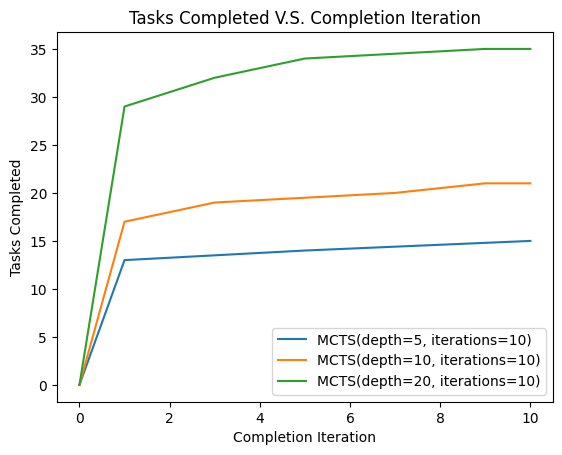

In [74]:
ci_5 = df.loc[5].mcts_df["completion_iteration"].value_counts().sort_index().cumsum()
ci_5.index = ci_5.index + 1; ci_5[0] = 0
ci_10 = df.loc[10].mcts_df["completion_iteration"].value_counts().sort_index().cumsum()
ci_10.index = ci_10.index + 1; ci_10[0] = 0; ci_10[10] = 21
ci_20 = df.loc[20].mcts_df["completion_iteration"].value_counts().sort_index().cumsum()
ci_20.index = ci_20.index + 1; ci_20[0] = 0; ci_20[10] = 35

ci_5.sort_index().plot(label="MCTS(depth=5, iterations=10)")
ci_10.sort_index().plot(label="MCTS(depth=10, iterations=10)")
ci_20.sort_index().plot(label="MCTS(depth=20, iterations=10)")

plt.title("Tasks Completed V.S. Completion Iteration")
plt.xlabel("Completion Iteration")
plt.ylabel("Tasks Completed")
plt.legend()

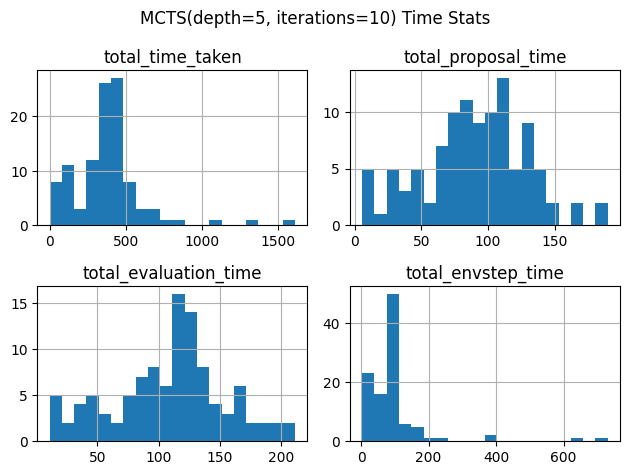

In [21]:
df.loc[5].time_df.hist(bins=20)
plt.suptitle("MCTS(depth=5, iterations=10) Time Stats")
plt.tight_layout()
plt.show()

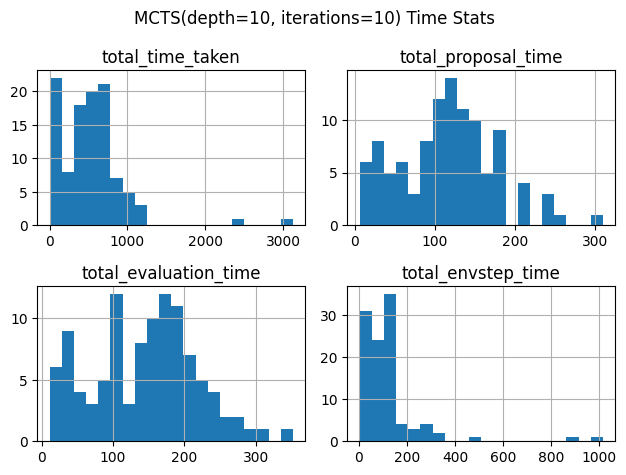

In [22]:
df.loc[10].time_df.hist(bins=20)
plt.suptitle("MCTS(depth=10, iterations=10) Time Stats")
plt.tight_layout()
plt.show()

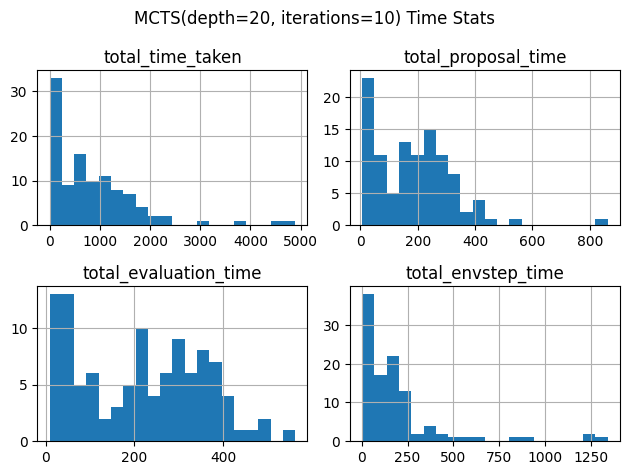

In [23]:
df.loc[20].time_df.hist(bins=20)
plt.suptitle("MCTS(depth=20, iterations=10) Time Stats")
plt.tight_layout()
plt.show()

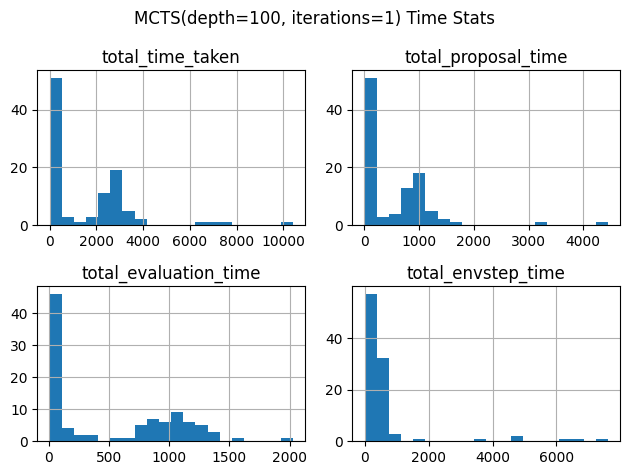

In [24]:
df.loc[100].time_df.hist(bins=20)
plt.suptitle("MCTS(depth=100, iterations=1) Time Stats")
plt.tight_layout()
plt.show()

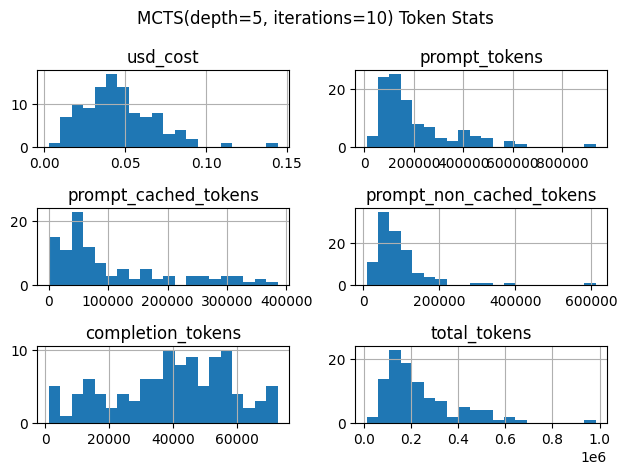

In [32]:
df.loc[5].token_df.hist(bins=20)
plt.suptitle("MCTS(depth=5, iterations=10) Token Stats")
plt.tight_layout()
plt.show()

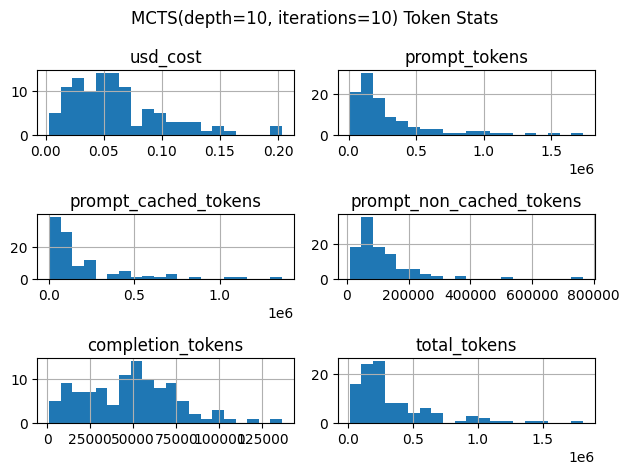

In [33]:
df.loc[10].token_df.hist(bins=20)
plt.suptitle("MCTS(depth=10, iterations=10) Token Stats")
plt.tight_layout()
plt.show()

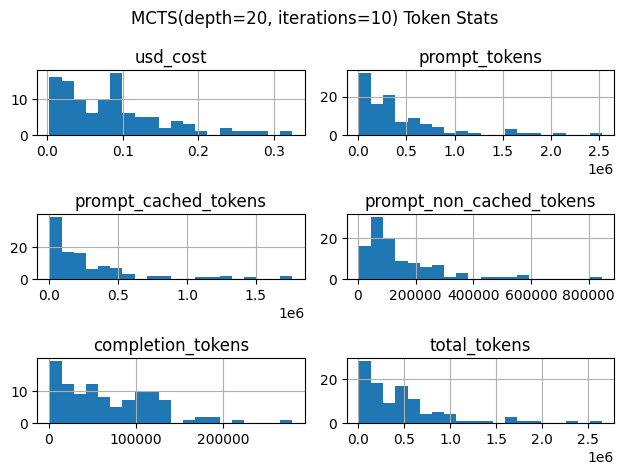

In [34]:
df.loc[20].token_df.hist(bins=20)
plt.suptitle("MCTS(depth=20, iterations=10) Token Stats")
plt.tight_layout()
plt.show()

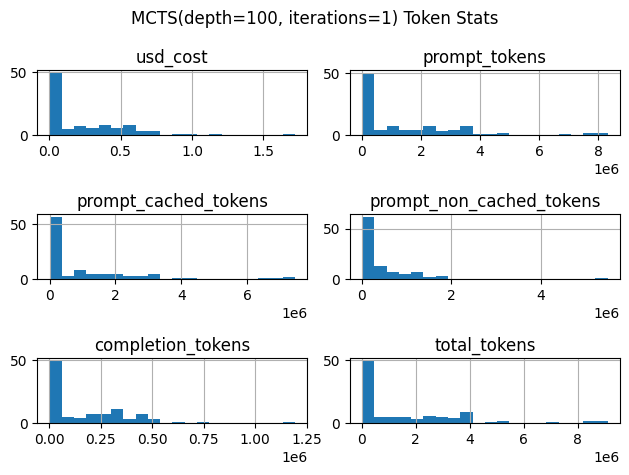

In [35]:
df.loc[100].token_df.hist(bins=20)
plt.suptitle("MCTS(depth=100, iterations=1) Token Stats")
plt.tight_layout()
plt.show()

In [38]:
df.loc[5].token_df["prompt_cached_tokens"].sum() / df.loc[5].token_df["total_tokens"].sum()

np.float64(0.444132166629737)

In [36]:
df.loc[10].token_df["prompt_cached_tokens"].sum() / df.loc[10].token_df["total_tokens"].sum()

np.float64(0.5360787212364256)

In [37]:
df.loc[20].token_df["prompt_cached_tokens"].sum() / df.loc[20].token_df["total_tokens"].sum()

np.float64(0.5618936986507974)

In [40]:
df.loc[100].token_df["prompt_cached_tokens"].sum() / df.loc[100].token_df["total_tokens"].sum()

np.float64(0.6384836215629782)

Text(0, 0.5, 'Proportion Cached')

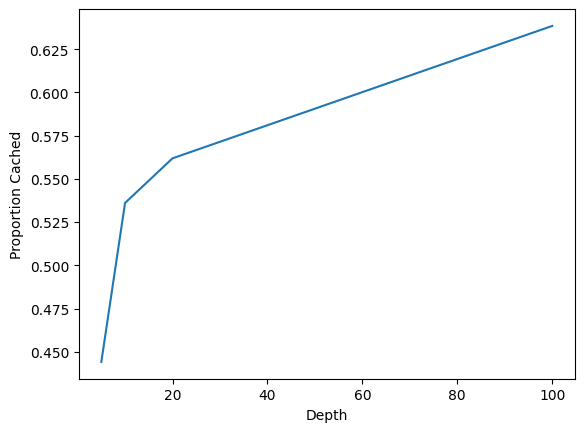

In [42]:
pd.Series(index=[5, 10, 20, 100], data=[0.444132166629737, 0.5360787212364256, 0.5618936986507974, 0.6384836215629782]).plot()
plt.xlabel("Depth")
plt.ylabel("Proportion Cached")

In [6]:
df["mcts_iterations"] = pd.Series(index=[5, 10, 20, 100], data=[10, 10, 10, 1])

In [11]:
df2 = df.reset_index()
df2[["mcts_depth", "mcts_iterations", "success_rate", "total_usd", "total_time"]]

,mcts_depth,mcts_iterations,success_rate,total_usd,total_time
0,5,10,0.141509,4.861763,40834.997811
1,10,10,0.198113,6.413142,57128.987742
2,20,10,0.330189,9.009063,91408.657527
3,100,1,0.234694,24.347977,151213.642555


In [12]:
df2 = df.reset_index()
df2[["mcts_depth", "mcts_iterations", "successes", "failures", "errors"]]

,mcts_depth,mcts_iterations,successes,failures,errors
0,5,10,15,89,2
1,10,10,21,82,3
2,20,10,35,67,4
3,100,1,23,71,4


In [ ]:
df.loc[100].token_df["prompt_cached_tokens"].sum(), df.loc[100].token_df["prompt_non_cached_tokens"].sum(), df.loc[100].token_df["completion_tokens"].sum()

(np.int64(42077970), np.int64(104365312), np.int64(17014806))

In [11]:
df.loc[100].mcts_df[df.loc[100].mcts_df["completion_depth"] == 34]

,completion_iteration,completion_depth,max_depth,env_steps_taken
task_name,,,,
webarena.630,0.0,34.0,34.0,34.0


In [12]:
df.loc[100].mcts_df["completion_depth"].value_counts().sort_index()

completion_depth
3.0     2
4.0     4
5.0     2
6.0     5
7.0     1
8.0     5
10.0    3
34.0    1
Name: count, dtype: int64

In [56]:
df.loc[20].mcts_df[(df.loc[20].mcts_df["completion_iteration"] > -1) & ((df.loc[10].mcts_df["completion_iteration"] > -1) )].shape[0]

/tmp/ipykernel_88489/3651096995.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.loc[20].mcts_df[(df.loc[20].mcts_df["completion_iteration"] > -1) & ((df.loc[10].mcts_df["completion_iteration"] > -1) )].shape[0]


16

In [46]:
df.loc[10].mcts_df[(df.loc[10].mcts_df["completion_iteration"] > 0) & (df.loc[10].mcts_df["completion_depth"] <= 6)]

,completion_iteration,completion_depth,max_depth
task_name,,,
webarena.67,2.0,6.0,6.0
webarena.30,2.0,4.0,4.0
webarena.400,6.0,5.0,5.0


In [47]:
df.loc[20].mcts_df[(df.loc[20].mcts_df["completion_iteration"] > 0) & (df.loc[20].mcts_df["completion_depth"] <= 11)]

,completion_iteration,completion_depth,max_depth
task_name,,,
webarena.408,8.0,4.0,4.0
webarena.598,2.0,8.0,8.0
webarena.401,2.0,7.0,7.0
webarena.727,2.0,7.0,7.0


In [48]:
df["successes"]

mcts_depth
5     15
10    21
20    35
Name: successes, dtype: int64

In [15]:
df.loc[10].mcts_df.value_counts()

NameError: name 'df' is not defined

In [21]:
df.loc[20].mcts_df.value_counts()

completion_iteration  completion_depth
0.0                   7.0                 5
                      8.0                 4
                      3.0                 4
                      2.0                 3
                      4.0                 3
                      5.0                 3
                      6.0                 2
2.0                   7.0                 2
0.0                   9.0                 1
                      10.0                1
                      12.0                1
                      16.0                1
                      21.0                1
2.0                   8.0                 1
3.0                   19.0                1
4.0                   19.0                1
8.0                   4.0                 1
Name: count, dtype: int64

In [64]:
df[["success_rate", "successes", "failures", "errors"]]

,success_rate,successes,failures,errors
mcts_depth,,,,
5,0.141509,15,89,2
10,0.198113,21,82,3
20,0.330189,35,67,4


In [65]:
df[["total_usd", "avg_usd"]]

,total_usd,avg_usd
mcts_depth,,
5,4.861763,0.045866
10,6.413142,0.060501
20,9.009063,0.084991


In [68]:
df[["total_time", "avg_time"]]

,total_time,avg_time
mcts_depth,,
5,40834.997811,385.235828
10,57128.987742,538.952715
20,91408.657527,862.345826


In [69]:
with open(f"depth_experiment_df.pkl", "wb") as f:
  pickle.dump(df, f)

In [78]:
df.loc[5].token_df.sum()["prompt_cached_tokens"] / df.loc[20].token_df.sum()["total_tokens"]

np.float64(0.21518763808320687)

In [76]:
df.loc[10].token_df.sum()["prompt_cached_tokens"] / df.loc[20].token_df.sum()["total_tokens"]

np.float64(0.3818400765842733)

In [77]:
df.loc[20].token_df.sum()["prompt_cached_tokens"] / df.loc[20].token_df.sum()["total_tokens"]

np.float64(0.5618936986507974)

In [1]:
df.loc[100]

NameError: name 'df' is not defined

/tmp/ipykernel_2704942/507405824.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


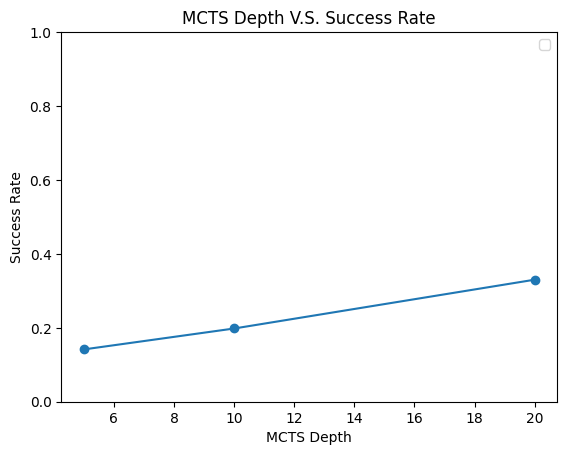

In [13]:
plt.plot(df.index, df["success_rate"], marker="o")
plt.xlabel("MCTS Depth")
plt.ylabel("Success Rate")
plt.ylim(0, 1)
plt.title("MCTS Depth V.S. Success Rate")
plt.legend()
plt.show()